In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import json, os, uuid
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
MOUNT_DIR = '/content/drive/MyDrive/BarclaysReviews/'
DATA_DIR = '/content/drive/MyDrive/BarclaysReviews/data/'
MODEL_DIR = '/content/drive/MyDrive/BarclaysReviews/model/'


In [ ]:
def saveFileToDrive(path,dataframe):

  with open(path, 'w', encoding = 'utf-8-sig') as f:
    dataframe.to_csv(f)
    print("Saving file : "+path)

In [ ]:
df = pd.read_csv(DATA_DIR+"final_merged_reviews_cleaned.csv")
ratingColName = 'customer_sentiment'
df[ratingColName] = 'POSITIVE'
for i in df.index:
    if df['rating'][i] > 3:
      df[ratingColName][i] = 'POSITIVE'
    else:
      df[ratingColName][i] = 'NEGATIVE'

<ipython-input-4-66f92829aa67>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ratingColName][i] = 'NEGATIVE'
<ipython-input-4-66f92829aa67>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ratingColName][i] = 'POSITIVE'


In [ ]:
df[df['developer_response'].notnull()].rating.value_counts()

1    2036
3     762
2     688
5     381
4     181
Name: rating, dtype: int64

In [ ]:
saveFileToDrive("/content/drive/MyDrive/BarclaysReviews/data/final_merged_reviews_cleaned.csv",df)

Saving file : /content/drive/MyDrive/BarclaysReviews/data/final_merged_reviews_cleaned.csv


In [ ]:
import spacy 
nlp = spacy.load('en_core_web_sm')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
barclays_stop_list = ['app', 'barclays','need','will','pay','work']
stop_words.extend(barclays_stop_list)
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:

import re
wnl = WordNetLemmatizer()
def tokenizer(text):
    regex_num_ponctuation = '(\d+)|([^\w\s])'
    regex_little_words = r'(\b\w{1,2}\b)'
    return [wnl.lemmatize(token.lemma_.lower()) for token in nlp(text) if not token.is_stop and not token.is_punct ]

def LemmaTokenizer(doc):
      wnl = WordNetLemmatizer()
      regex_num_ponctuation = '(\d+)|([^\w\s])'
      regex_little_words = r'(\b\w{1,2}\b)'
      return [wnl.lemmatize(t) for t in word_tokenize(doc) 
              if not re.search(regex_num_ponctuation, t) and not re.search(regex_little_words, t) and not t.is_stop and not t.is_punct]

In [ ]:
!pip install lda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.9/320.9 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 11.6 MB/s eta 0:00:00
  Created wheel for lda: filename=lda-2.0.0-cp310-cp310-linux_x86_64.whl size=628186 sha256=646b4d71854ce1bbb6ee8a2bc6050e50679e2e608ee2361634e49ab91d88473e
  Stored in directory: /root/.cache/pip/wheels/9d/32/fa/07fdf278a0b24269ce4d0be3d642c28dd0e888a4c5f2031279
Successfully built lda


In [ ]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=831a1061c33eb60c2a0d5c642c4af9c715a2e3ec9cc47f7ab89279077e0e3521
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55640 sha256=047589576b3038ca89278538ea1abed8b25dc389f304413d5e4729017a526f0d
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [ ]:
!pip install sentence-transformers
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 59.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 63.8 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=4348b3d8e34f1fc546d820706cf72f45eabb363b946c7b10b17dda2b252431bd
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install HDBSCAN

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 44.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for HDBSCAN: filename=hdbscan-0.8.29-cp310-cp310-linux_x86_64.whl size=3541541 sha256=994a1073425576afc62147f8d182e287d8ae392b11dba04e6ee953ddb8a0f245
  Stored in directory: /root/.cache/pip/wheels/dc/52/e3/6c6b60b126b4d5c4370cb5ac071b82950f91649d62d72f7f56
Successfully built HDBSCAN


In [ ]:
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 kB 3.4 MB/s eta 0:00:00


In [ ]:
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN

embedding_model = SentenceTransformer('all-MiniLM-L6-v2')


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 

In [ ]:
from bertopic import BERTopic

In [ ]:

import time

In [ ]:
def topicModellingBERT(df,columns, textCol = "cleaned_data",min_df=4,max_features = 10000,min_cluster_size=80,top_n_words=5,path="",model_name="",replace_dict={}):
  print(columns)
  if bool(columns):
    # print("columns")
    for key in columns:
      # print(df.shape)
      df = df[df[key].str.contains(columns[key])]

  umap_model = UMAP(n_neighbors=3, n_components=3, min_dist=0.05)
  hdbscan_model = HDBSCAN(min_cluster_size=min_cluster_size, min_samples=40,
                        gen_min_span_tree=True,
                        prediction_data=True)
  min_df = min_df # minimum required occurences of a word, e.g 4
  max_features = max_features # max number of unique words, e.g 10000

  # vectorizer_model = CountVectorizer(
  #               min_df=min_df, 
  #               max_features=max_features, 
  #               tokenizer=tokenizer, # use tokenizer we defined before
  #               ngram_range=(1,2),
  #               stop_words=stop_words) # we use unigram & bigram
  # X = vectorizer.fit_transform(final_merged_reviews_not_null['review_description'])


  df = df[df[textCol].notnull()]
  if bool(replace_dict):
    df[textCol].replace(replace_dict,inplace=True,regex=True) 
  print('dataet length: ',df.shape,'\n')
  # # we add this to remove stopwords that can pollute topcs
  vectorizer_model = CountVectorizer(ngram_range=(1, 1), min_df=min_df,max_features=max_features)
  df.reset_index(drop=True, inplace=True)
  model = BERTopic(
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    embedding_model=embedding_model,
    vectorizer_model=vectorizer_model,
    top_n_words=5,
    language='english',
    calculate_probabilities=True,
    verbose=True
  )
  topics, probs = model.fit_transform(df[textCol])
  print(model.get_topic_info())

  custom_labels = []
  custom_labels_temp = model.generate_topic_labels(nr_words=1)
  # negative_custom_labels.type
  for i in custom_labels_temp:
    custom_labels.append(i.split('_')[1])
  model.set_topic_labels(custom_labels)

  model.save(path+model_name+'_'+str(int(time.time())))
  return  df,topics, probs, model



In [ ]:
df = pd.read_csv(DATA_DIR+"final_merged_reviews_cleaned.csv")

In [ ]:
df=df[df["customer_sentiment"].str.contains('POSITIVE') & df["cleaned_data"].notnull()]
df.reset_index(drop=True, inplace=True)

In [ ]:
df = pd.read_csv(DATA_DIR+"final_merged_reviews_cleaned.csv")
positive_df, positive_topics,  positive_probs,  positive_model = topicModellingBERT(df=df,columns = {"customer_sentiment":'POSITIVE'},min_df=4,min_cluster_size=120,path=MODEL_DIR,model_name='positive_topic_modelling',replace_dict={"year":"year_no_problem","year":"problem","year problem":"year_no_problem","quick quick":"quick","cheque pay":"pay cheque","secure secure":"secure","excellent_excellent":"excellent","issue":"no_issue","simple_simple":"simple","navigate_navigate":"navigate","convenient_convenient":"convenient","reliable_reliable":"reliable","quick_simple":"simple","efficient_efficient":"efficient"})


#ess, googlepay , barclaycard,credicard,transfer,money

{'customer_sentiment': 'POSITIVE'}
dataet length:  (21590, 22) 



Batches:   0%|          | 0/675 [00:00<?, ?it/s]

2023-05-04 09:35:49,264 - BERTopic - Transformed documents to Embeddings
2023-05-04 09:36:06,443 - BERTopic - Reduced dimensionality
2023-05-04 09:36:13,868 - BERTopic - Clustered reduced embeddings


    Topic  Count                                     Name
0      -1   8568       -1_excellent_efficient_simple_work
1       0   5905              0_barclay_account_money_pay
2       1    690    1_service_reliable_user_friendly_fast
3       2    645              2_great_manage_service_find
4       3    616   3_service_helpful_user_friendly_secure
5       4    525                     4_great_yes_anymore_
6       5    495           5_excellent_cool_great_exactly
7       6    465              6_secure_security_safe_fast
8       7    376                 7_problem_work_safe_fine
9       8    332      8_happy_satisfied_comfortable_super
10      9    297      9_quick_fault_convenient_whatsoever
11     10    242          10_quick_long_response_nonsense
12     11    187             11_clear_navigate_lay_simple
13     12    183  12_experience_access_fingertip_facility
14     13    182        13_navigate_security_simple_quick
15     14    177       14_convenient_fast_quick_efficient
16     15    1

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



In [ ]:
positive_final =BERTopic.load(MODEL_DIR+'positive_topic_modelling_1683191569')
positive_final.get_topic_info()

,Topic,Count,Name,CustomName
0,-1,10164,-1_excellent_efficient_quick_great,excellent
1,0,1454,0_payment_money_transfer_account,payment
2,1,1447,1_security_secure_service_time,security
3,2,1386,2_barclay_account_problem_customer,barclay
4,3,463,3_great_greatd_sort_polite,great
5,4,369,4_convenient_helpful_service_useful,convenient
6,5,357,5_navigate_simple_navigation_life,navigate
7,6,323,6_great_brilliant_superb_save,great
8,7,316,7_fantastic_brilliant_lose_greatly,fantastic
9,8,301,8_cheque_pay_photo_picture,cheque


In [ ]:
#x = positive_model
positive_final.reduce_topics(docs=positive_df['cleaned_data'],nr_topics=20)

2023-05-04 09:43:38,289 - BERTopic - Reduced number of topics from 40 to 20


In [ ]:
positive_final.visualize_barchart(top_n_topics=20)
# 2 + 15 + 1 + 5 - Payment/Transaction
# 3 + 12 - Security
# 6 - Navigation
# 7 - Installation
# 9 - Chat Support
# 17 + 10 - Biometric
# 16 - Branch
# 0 + 8 + 14 - Service
# 13 - Mobile Accessibility
#4,11,18 - Miscellaneous

In [ ]:
topics_to_merge =[[3,8]]
positive_final.merge_topics(df['cleaned_data'], topics_to_merge)
positive_final.get_topic_info()

,Topic,Count,Name
0,-1,10164,-1_excellent_great_quick_work
1,0,4284,0_barclay_account_pay_money
2,1,2639,1_great_excellent_brilliant_service
3,2,1737,2_secure_security_service_time
4,3,1060,3_work_crash_happy_problem
5,4,520,4_simple_navigate_life_user_friendly
6,5,485,5_quick_reliable_install_instal
7,6,341,6_smooth_fingertip_problem_reliable
8,7,228,7_chat_life_transaction_clear
9,8,132,8_branch_find_close_closed


In [ ]:
positive_final.visualize_barchart(top_n_topics=11)

In [ ]:
positive_final.get_topic_info()

,Topic,Count,Name
0,-1,10164,-1_excellent_great_quick_work
1,0,4284,0_barclay_account_pay_money
2,1,2639,1_great_excellent_brilliant_service
3,2,1737,2_secure_security_service_time
4,3,1060,3_work_crash_happy_problem
5,4,520,4_simple_navigate_life_user_friendly
6,5,485,5_quick_reliable_install_instal
7,6,341,6_smooth_fingertip_problem_reliable
8,7,228,7_chat_life_transaction_clear
9,8,132,8_branch_find_close_closed


In [ ]:
custom_labels = ['Miscellaneous', 'Payment','Feedback','Security','Device','Navigation','Installation','Responsiveness','Chat Support', 'Branch']

positive_final.set_topic_labels(custom_labels)

In [ ]:
positive_final.custom_labels_

['Miscellaneous',
 'Payment',
 'Feedback',
 'Security',
 'Device',
 'Navigation',
 'Installation',
 'Responsiveness',
 'Chat Support',
 'Branch']

In [ ]:
positive_final.save(MODEL_DIR+'Positive_topic_final_version')

In [ ]:
positive_final.get_document_info(docs=positive_df['cleaned_data']).head()

,Document,Topic,Name,CustomName,Top_n_words,Probability,Representative_document
0,touch button convenient,6,6_smooth_fingertip_problem_reliable,Responsiveness,smooth - fingertip - problem - reliable - touch,1.000000,False
1,access clear instruction,0,0_barclay_account_pay_money,Payment,barclay - account - pay - money - payment,1.000000,False
2,technophobe great exceptionally great,2,2_secure_security_service_time,Security,secure - security - service - time - simple,0.237660,False
3,ups barclay,-1,-1_excellent_great_quick_work,Miscellaneous,excellent - great - quick - work - efficient,0.121723,False
4,brilliant,1,1_great_excellent_brilliant_service,Feedback,great - excellent - brilliant - service - fant...,1.000000,False


In [ ]:
df = pd.read_csv(DATA_DIR+"final_merged_reviews_cleaned.csv")
df = df[df['customer_sentiment'].str.contains('POSITIVE') & df['cleaned_data'].notnull()]
df.reset_index(drop=True, inplace=True)
df_pos = df.join(positive_final.get_document_info(docs=positive_df['cleaned_data']))
saveFileToDrive(DATA_DIR+'postive_final_review.csv',df_pos)

Saving file : /content/drive/MyDrive/BarclaysReviews/data/postive_final_review.csv


In [ ]:
df = pd.read_csv(DATA_DIR+"postive_final_review.csv")
positive_Payment_df,positive_Payment_topics,  positive_Payment_probs,  positive_Payment_model = topicModellingBERT(df=df,columns = {"CustomName":'Payment'} ,min_df=2,min_cluster_size=80,path=MODEL_DIR,model_name='positive_topic_Payment_modelling',replace_dict={})
# misc >

{'CustomName': 'Payment'}
dataet length:  (4284, 30) 



Batches:   0%|          | 0/134 [00:00<?, ?it/s]

2023-05-04 12:31:12,731 - BERTopic - Transformed documents to Embeddings
2023-05-04 12:31:21,344 - BERTopic - Reduced dimensionality
2023-05-04 12:31:21,887 - BERTopic - Clustered reduced embeddings


   Topic  Count                                    Name
0     -1    640  -1_convenient_service_instruction_card
1      0   2851           0_barclay_account_great_money
2      1    328                 1_cheque_pay_photo_work
3      2    160          2_finance_manage_money_control
4      3    124      3_transaction_fast_great_excellent
5      4     93        4_update_review_problem_download
6      5     88   5_helpful_convenient_generally_useful


/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



In [ ]:
positive_Payment_model.get_topic_info()

,Topic,Count,Name,CustomName
0,-1,421,-1_excellent_reliable_clear_simple,excellent
1,0,288,0_service_customer_excellent_online,service
2,1,189,1_safe_secure_security_simple,safe
3,2,119,2_efficient_time_fast_improve,efficient
4,3,105,3_find_old_technology_great,find
5,4,87,4_save_time_load_helpful,save
6,5,61,5_navigate_understand_security_life,navigate
7,6,59,6_user_friendly_happy_user_couple,user
8,7,58,7_intuitive_feature_function_great,intuitive
9,8,54,8_security_home_ease_concern,security


In [ ]:
positive_Payment_model.visualize_barchart(top_n_topics=10)

# Positive Ends Here

In [46]:
pd.set_option('display.max_colwidth', -1)
df = pd.read_csv(DATA_DIR+"final_merged_reviews_cleaned.csv")
df[df['review_description'].str.contains('fscs') & df['customer_sentiment'].str.contains('NEGATIVE')][['review_description','rating','review_date']].head(20)
# df[df['review_description'].str.contains('force') & df['customer_sentiment'].str.contains('NEGATIVE')].source.value_counts()

,review_description,rating,review_date
9658,"i've been trying to open an account for the past week but the app keeps crashing! i passed the verification and security checks but at the final step, the app shows the fscs document and then continually restarts. there's no way to proceed! i give up",1,2022-11-10
9675,"most useless app and bad customer service by barclays. went to branch but was forced to open account via app. went through i.d part through the app but once you get to the fscs part the app repeatedly crashes and takes you to login screen. i had an application reference, called barclays to continue with application but was told nothing they could do, i had to go into branch. lots of reviews with the same error but not one reply from barclays to address the issue. barclays take responsibility!",1,2022-11-10
9800,"trying to open an account, app keeps crashing. i've verified my address, and every time i open the app, it asks for my pin, which i put in, then it asks me to accept the fscs agreement, which i do, then it crashes and reopens. i don't know if my account is opening or not?",1,2022-11-09
9848,trying to open new account.. app crashes in loop after i agreed fscs... please fix it,1,2022-11-08
9862,"app crashes on tap of agree and continue button on the fscs screen. so, i am trying to open an account and after having completed the id verification and current address verification, the app is not allowing me to proceed further. it keeps crashing when i tap on the agree and continue button on the fscs screen. terrible experience!",1,2022-11-08
10036,can't open a new premier account. the app doesn't go past fscs acknowledgement screen. it takes me back to my pass code login. once i key in my pass code then i'm back to the step3 acknowledge fscs terms screen. once i acknowledge i go back to the pass screen again. stuck in a loop here. barclays fix this please.,1,2022-11-05
10092,tried to open an account app kept crashing and could not get past the fscs conditions as i got stuck in a loop of the app crashing and restarting.,1,2022-11-04
10100,unusable app keeps crashing on account opening / fscs acceptance step.,1,2022-11-04
10152,"when registering, the app can't get past reviewing the fscs documents. it crashes every time.",1,2022-11-04
10215,after agreeing to the fscs document the app crashes and goes back to that point again and again.,2,2022-11-03


In [ ]:
|
negative_model = BERTopic.load(MODEL_DIR+'negative_sentiment_version_2')
negative_model.get_topic_info()

,Topic,Count,Name,CustomName
0,-1,2243,-1_slow_account_bad_payment,Misc
1,0,1246,0_contactless_payment_contactless payment_slow,Payments
2,1,604,1_account_slow_money_login,Account
3,2,496,2_crash_calendar_calendar_view_notification,Crash
4,3,471,3_update_slow_phone_new,Update
5,4,463,4_cheque_photo_picture_slow,Cheque
6,5,423,5_chat_slow_service_help,Chat
7,6,123,6_navigate_fscs_open_crash,Navigate
8,7,103,7_notification_money_payment_spend,Notification


In [ ]:
custom_labels = ['Misc','Payments','Account','Crash','Update','Cheque','Chat','Navigate','Notification']


negative_model.set_topic_labels(custom_labels)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter

def percentageBarplotByModel(model_name,perCol="CustomName",countCol='Count', color='salmon',columns={},title="",x_label="Topics"):
  model = BERTopic.load(MODEL_DIR+model_name)
  model_data = model.get_topic_info()
  print(model_data)
  #model_data = model_data[model_data[]]
  total = sum(model_data[countCol])
  plt.bar(model_data[perCol], [v/total for v in model_data[countCol]], color=color)
  plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=0))
  plt.title(title)
  plt.xlabel(x_label)
  plt.grid(axis='y')
  # plt.figure(figsize=(12,12))
  plt.rcParams["figure.figsize"] = (1,1)
  plt.show()



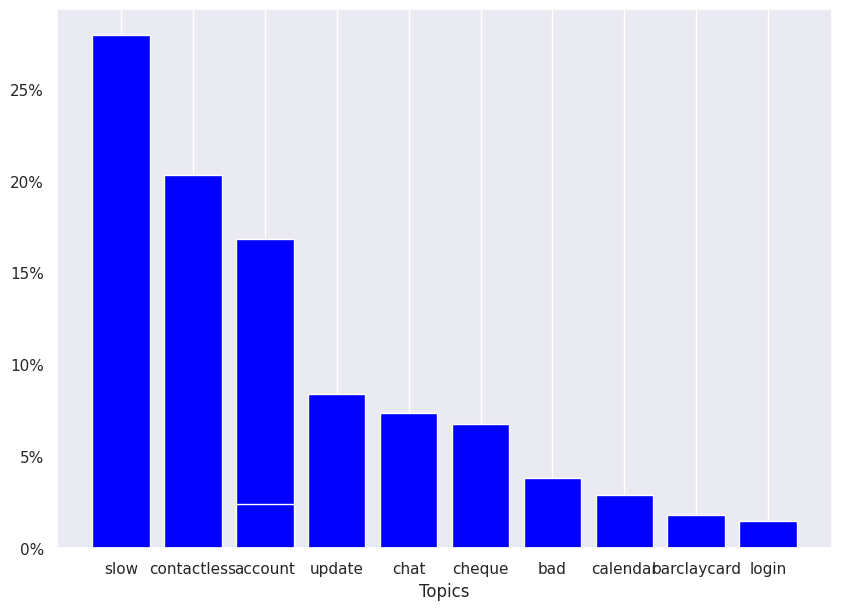

In [ ]:
percentageBarplotByModel('negative_topic_modelling_1683133207',color='blue')

In [ ]:
def percentagePieplotByModel(model_name,perCol="CustomName",countCol='Count', color='salmon',columns={},title="Distribution of topic counts",x_label="Topics"):
  model = BERTopic.load(MODEL_DIR+model_name)
  model_data = model.get_topic_info()
  if len(model_data)!= 1:
    model_data = model_data[model_data['Topic']!=-1]
  plt.pie(model_data[countCol], labels=model_data[perCol], autopct="%1.1f%%")
  plt.title(title)
  plt.figure(figsize=(10,8))
  plt.show()

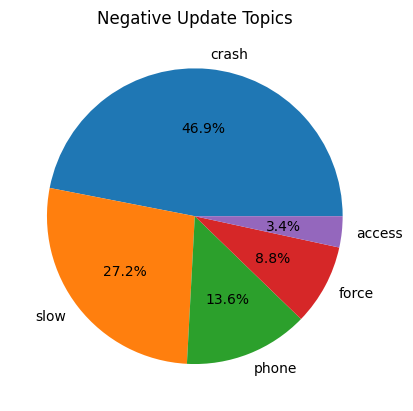

<Figure size 1000x800 with 0 Axes>

In [ ]:
percentagePieplotByModel('negative_topic_update_modelling_1682939618',title="Negative Update Topics") 

In [ ]:
def wordCountplotByModel(model_name,perCol="CustomName",countCol='Count', color='salmon',columns={},title="Distribution of topic counts",x_label="Topics"):
  model = BERTopic.load(MODEL_DIR+model_name)
  model_data = model.get_topic_info()
  sns.set(rc={'figure.figsize':(10,7)})
  sns.barplot(data=model_data, x=perCol, y= countCol) 
  plt.title(title)
  plt.xlabel(x_label)
  plt.show()

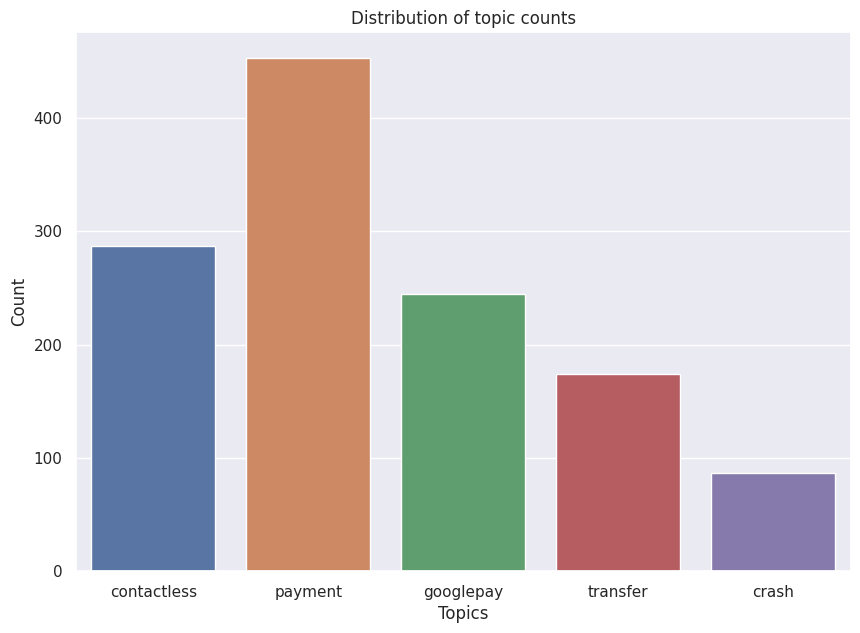

In [ ]:
wordCountplotByModel('negative_topic_payments_modelling_1682932697')

In [ ]:
df = pd.read_csv(DATA_DIR+"final_merged_reviews_cleaned.csv")
df = df[df['customer_sentiment'].str.contains('NEGATIVE') & df['cleaned_data'].notnull()]
df.reset_index(drop=True, inplace=True)
df_topics = negative_model.get_document_info(df['cleaned_data'])

In [ ]:
word_count_per_topic = {}
topics = df_topics['Topic']
documents = df_topics['Document']
from collections import Counter

for topic in range(-1,df_topics.Topic.nunique()-1):
    # Get the indices of documents belonging to this topic
    indices = [i for i, t in enumerate(topics) if t == topic]
    # Flatten the list of documents belonging to this topic
    words = [word for doc in [documents[i] for i in indices] for word in doc.split()]
    # Count the occurrences of each word in this topic
    word_counts = Counter(words)
    # Add the word count for this topic to the dictionary
    word_count_per_topic[topic] = word_counts

keys = list(word_count_per_topic.keys())
values = list(word_count_per_topic.values())
sorted_value_index = np.argsort(values)
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

# Print the word count per topic
for topic, word_counts in sorted_dict.items():
    print(f"Topic {topic}: {word_counts}")

Topic -1: Counter({'slow': 884, 'account': 500, 'payment': 482, 'bad': 469, 'phone': 355, 'update': 347, 'open': 237, 'login': 234, 'device': 204, 'card': 195, 'help': 192, 'crash': 190, 'change': 179, 'new': 177, 'transaction': 168, 'customer': 166, 'like': 165, 'issue': 154, 'contactless': 153, 'money': 130, 'problem': 126, 'service': 124, 'screen': 123, 'year': 120, 'option': 119, 'support': 119, 'payee': 117, 'fix': 116, 'detail': 115, 'set': 113, 'month': 110, 'useless': 106, 'tell': 103, 'googlepay': 103, 'day': 102, 'allow': 96, 'access': 96, 'feature': 94, 'close': 94, 'great': 92, 'navigate': 91, 'way': 91, 'load': 90, 'online': 90, 'branch': 90, 'transfer': 87, 'check': 86, 'error': 84, 'look': 84, 'balance': 84, 'number': 84, 'loginin': 83, 'start': 81, 'experience': 77, 'fine': 75, 'people': 74, 'leave': 73, 'download': 73, 'constantly': 73, 'week': 71, 'statement': 71, 'someslow': 70, 'add': 69, 'register': 68, 'message': 67, 'android': 66, 'sort': 66, 'star': 66, 'delete'

In [ ]:
df = pd.read_csv(DATA_DIR+"final_merged_reviews_cleaned.csv")
df,topics, probs, model = topicModellingBERT(df=df,columns= {"customer_sentiment":"NEGATIVE"},min_df=3,min_cluster_size=80,path=MODEL_DIR,model_name='negative_topic_modelling',replace_dict={"contactless payment":"contactless"})
 

In [ ]:
df = pd.read_csv(DATA_DIR+"final_merged_reviews_cleaned.csv")
df = df[df['customer_sentiment'].str.contains('NEGATIVE') & df['cleaned_data'].notnull()]
df.reset_index(drop=True, inplace=True)
negative_model_2 = BERTopic.load(MODEL_DIR+'negative_topic_modelling_1683133207')
# negative_model_2.get_document_info(df['cleaned_data'])
negative_model_2.get_topic_info()

,Topic,Count,Name,CustomName
0,-1,1725,-1_slow_bad_account_phone,slow
1,0,1253,0_contactless_device_payment_googlepay,contactless
2,1,1038,1_account_slow_money_transfer,account
3,2,518,2_update_crash_slow_phone,update
4,3,453,3_chat_service_slow_help,chat
5,4,418,4_cheque_photo_picture_camera,cheque
6,5,235,5_bad_crash_awful_bad bad,bad
7,6,178,6_calendar_calendar_view_calender_crash,calendar
8,7,150,7_account_mortgage_open_open account,account
9,8,111,8_barclaycard_credicard_barclay_card,barclaycard


In [ ]:
topics_to_merge =[ [2,5]]
negative_model_2.merge_topics(df['cleaned_data'], topics_to_merge)
negative_model_2.get_topic_info()

,Topic,Count,Name
0,-1,1725,-1_slow_bad_account_phone
1,0,1253,0_contactless_payment_contactless payment_device
2,1,1149,1_account_slow_money_bad
3,2,903,2_update_crash_slow_account
4,3,453,3_chat_slow_service_help
5,4,418,4_cheque_photo_picture_camera
6,5,178,5_calendar_calendar_view_calender_crash
7,6,93,6_slow_login_someslow_open


In [ ]:
negative_model_2.set_topic_labels({-1:"Misc", 0: "Payment", 1: "Account",2:'Update',3:'Chat',4:'Cheque',5:'Calender',6:'Login'})
negative_model_2.custom_labels_

['Misc', 'Payment', 'Account', 'Update', 'Chat', 'Cheque', 'Calender', 'Login']

In [ ]:
negative_model_2.save(MODEL_DIR+'Negative_topic_final_version_3')

In [ ]:
df = pd.read_csv(DATA_DIR+"final_merged_reviews_cleaned.csv")
df = df[df['customer_sentiment'].str.contains('NEGATIVE') & df['cleaned_data'].notnull()]
df.reset_index(drop=True, inplace=True)
df_final=df.join(negative_model.get_document_info(df['cleaned_data']))
# df_topics = negative_model.get_document_info(df['cleaned_data'])
saveFileToDrive(DATA_DIR+'Negative_topic_modelling_data_version_3.csv',df_final)

Saving file : /content/drive/MyDrive/BarclaysReviews/data/Negative_topic_modelling_data_version_3.csv


In [ ]:
classes =negative_model_2.generate_topic_labels(nr_words=1)
classes

['-1_slow',
 '0_contactless',
 '1_account',
 '2_update',
 '3_chat',
 '4_cheque',
 '5_bad',
 '6_calendar',
 '7_account',
 '8_barclaycard',
 '9_login']

In [ ]:
classes = negative_model_2.get_document_info(df['cleaned_data']).CustomName.tolist()

In [ ]:
df = pd.read_csv(DATA_DIR+"final_merged_reviews_cleaned.csv")
df = df[df['customer_sentiment'].str.contains('NEGATIVE') & df['cleaned_data'].notnull()]
df.reset_index(drop=True, inplace=True)


In [ ]:
topics_per_class = negative_model_2.topics_per_class(df['cleaned_data'], classes=classes)


10it [00:00, 14.77it/s]


In [ ]:
negative_model_2.visualize_topics_per_class(topics_per_class, top_n_topics=10)

In [ ]:
negative_model_2.reduce_topics(df['cleaned_data'],nr_topics=7)
negative_model_2.get_topic_info()

2023-05-03 17:14:26,680 - BERTopic - Reduced number of topics from 11 to 7


,Topic,Count,Name
0,-1,1725,-1_slow_bad_account_phone
1,0,1734,0_account_slow_chat_bad
2,1,1253,1_contactless_payment_contactless payment_device
3,2,753,2_update_crash_slow_bad
4,3,418,3_cheque_photo_picture_camera
5,4,178,4_calendar_calendar_view_crash_calender
6,5,111,5_barclaycard_credicard_barclay_card


In [ ]:
df = pd.read_csv(DATA_DIR+"Negative_topic_modelling_data.csv")
negative_df, negative_topics,  negative_probs,  negative_model = topicModellingBERT(df=df,columns = {"CustomName":'contactless'}, min_df=2,min_cluster_size=40,path=MODEL_DIR,model_name='negative_topic_1_modelling',replace_dict={"payment":"","slow":"","crash":"","account":""})
#contactless, googlepay , barclaycard,credicard,transfer,money

{'CustomName': 'contactless'}
dataet length:  (1246, 28) 



Batches:   0%|          | 0/39 [00:00<?, ?it/s]

2023-05-01 17:01:21,743 - BERTopic - Transformed documents to Embeddings
2023-05-01 17:01:25,679 - BERTopic - Reduced dimensionality
2023-05-01 17:01:25,766 - BERTopic - Clustered reduced embeddings


   Topic  Count                                         Name
0     -1     81             -1_contactless_gpay_contact_sort
1      0    971              0_contactless_phone_device_card
2      1     98       1_barclaycard_credicard_barclay_update
3      2     96  2_transfer_money_transaction_transfer money


In [ ]:
negative_df, negative_topics,  negative_probs,  negative_model = topicModellingBERT(df=df,columns = {"CustomName":'contactless',"cleaned_data":"contactless"}, min_df=2,min_cluster_size=80,path=MODEL_DIR,model_name='negative_topic_1_modelling',replace_dict={"payment":"","slow":"","crash":"","account":""})


In [ ]:
df = pd.read_csv(DATA_DIR+"Negative_topic_modelling_data.csv")
negative_Account_df, negative_Account_topics,  negative_Account_probs,  negative_Account_model = topicModellingBERT(df=df,columns = {"CustomName":'account'} ,min_df=2,min_cluster_size=40,path=MODEL_DIR,model_name='negative_topic_account_modelling',replace_dict={"account":"","slow":""})
#login/register , pin,latest_version

{'CustomName': 'account'}
dataet length:  (604, 28) 



Batches:   0%|          | 0/19 [00:00<?, ?it/s]

2023-05-01 10:22:08,355 - BERTopic - Transformed documents to Embeddings
2023-05-01 10:22:11,453 - BERTopic - Reduced dimensionality
2023-05-01 10:22:11,498 - BERTopic - Clustered reduced embeddings


   Topic  Count                                 Name
0 -1      15     -1_saving_lloyd_latest_version_save
1  0      328    0_money_bad_year_payment           
2  1      261    1_login_open_register_device       


In [ ]:
df = pd.read_csv(DATA_DIR+"Negative_topic_modelling_data.csv")
negative_crash_df, negative_crash_topics,  negative_crash_probs,  negative_crash_model = topicModellingBERT(df=df,columns = {"CustomName":'crash'} ,min_df=2,min_cluster_size=40,path=MODEL_DIR,model_name='negative_topic_crash_modelling',replace_dict={"crash":"","slow":""})
#calender, notification-crash

{'CustomName': 'crash'}
dataet length:  (496, 28) 



Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2023-05-01 10:16:55,978 - BERTopic - Transformed documents to Embeddings
2023-05-01 10:16:58,957 - BERTopic - Reduced dimensionality
2023-05-01 10:16:58,994 - BERTopic - Clustered reduced embeddings


   Topic  Count                                       Name
0 -1      139    -1_constantly_notification_calendar_fix  
1  0      156    0_calendar_view_payment_calendar_calender
2  1      119    1_notification_phone_ped_worke_bad       
3  2      82     2_login_bad_review_constantly            


In [ ]:
df = pd.read_csv(DATA_DIR+"Negative_topic_modelling_data.csv")
negative_chat_df, negative_chat_topics,  negative_chat_probs,  negative_chat_model = topicModellingBERT(df=df,columns = {"CustomName":'Chat'} ,min_df=1,min_cluster_size=10,path=MODEL_DIR,model_name='negative_topic_chat_modelling',replace_dict={"chat":"","slow":""})
#statement ,  service, crash/redirect,download,login 

{'CustomName': 'Chat'}
dataet length:  (423, 28) 



Batches:   0%|          | 0/14 [00:00<?, ?it/s]

2023-05-04 13:08:33,047 - BERTopic - Transformed documents to Embeddings
2023-05-04 13:08:36,105 - BERTopic - Reduced dimensionality
2023-05-04 13:08:36,138 - BERTopic - Clustered reduced embeddings


   Topic  Count                             Name
0     -1    345      -1_bad_service_help_message
1      0     47  0_service_bad_customer_function
2      1     31    1_answer_person_function_hour


In [ ]:
df = pd.read_csv(DATA_DIR+"Negative_topic_modelling_data.csv")
negative_slow_df, negative_slow_topics,  negative_slow_probs,  negative_slow_model = topicModellingBERT(df=df,columns = {"CustomName":'slow'} ,min_df=2,min_cluster_size=30,path=MODEL_DIR,model_name='negative_topic_slow_modelling',replace_dict={})
# misc >

{'CustomName': 'slow'}
dataet length:  (2243, 28) 



Batches:   0%|          | 0/71 [00:00<?, ?it/s]

2023-05-03 06:13:18,232 - BERTopic - Transformed documents to Embeddings
2023-05-03 06:13:24,805 - BERTopic - Reduced dimensionality
2023-05-03 06:13:24,925 - BERTopic - Clustered reduced embeddings


   Topic  Count                                               Name
0     -1    249                    -1_logino_people_support_change
1      0   1438                       0_slow_account_payment_phone
2      1    187                            1_service_slow_load_bad
3      2    128                      2_bad_bad bad_awful_bad awful
4      3     90  3_googlepay_support_support googlepay_google_w...
5      4     87                     4_open_update_advert_excellent
6      5     64                       5_loginin_starle_star_update


In [ ]:
df = negative_slow_model.get_document_info(negative_slow_df['cleaned_data'])
negative_account_sub_topic_df, negative_account_sub_topics,  negative_account_sub_probs,  negative_account_sub_model = topicModellingBERT(df=df,textCol="Document",columns = {"CustomName":'account'} ,min_df=1,min_cluster_size=30,path=MODEL_DIR,model_name='negative_topic_account_sub_modelling',replace_dict={"account":""})


{'CustomName': 'account'}
dataet length:  (1292, 7) 



Batches:   0%|          | 0/41 [00:00<?, ?it/s]

2023-05-02 10:09:43,222 - BERTopic - Transformed documents to Embeddings
2023-05-02 10:09:50,820 - BERTopic - Reduced dimensionality
2023-05-02 10:09:51,007 - BERTopic - Clustered reduced embeddings


   Topic  Count                            Name
0 -1      159    -1_branch_ipad_business_update
1  0      1071   0_payment_phone_bad_update    
2  1      62     1_mortgage_open_current_close 


In [ ]:
df = pd.read_csv(DATA_DIR+"Negative_topic_modelling_data.csv")
negative_notification_df, negative_notification_topics,  negative_notification_probs,  negative_notification_model = topicModellingBERT(df=df,columns = {"CustomName":'notification'} ,min_df=1,min_cluster_size=5,path=MODEL_DIR,model_name='negative_topic_notification_modelling',replace_dict={"notification":""})


{'CustomName': 'notification'}
dataet length:  (103, 28) 



Batches:   0%|          | 0/4 [00:00<?, ?it/s]

2023-05-01 09:59:28,476 - BERTopic - Transformed documents to Embeddings
2023-05-01 09:59:32,690 - BERTopic - Reduced dimensionality
2023-05-01 09:59:32,704 - BERTopic - Clustered reduced embeddings


   Topic  Count                             Name
0 -1      103    -1_payment_money_account_online


In [ ]:
df = pd.read_csv(DATA_DIR+"Negative_topic_modelling_data.csv")
negative_cheque_df, negative_cheque_topics,  negative_cheque_probs,  negative_cheque_model = topicModellingBERT(df=df,columns = {"CustomName":'cheque'} ,min_df=1,min_cluster_size=5,path=MODEL_DIR,model_name='negative_topic_cheque_modelling',replace_dict={"cheque":""})


{'CustomName': 'cheque'}
dataet length:  (463, 28) 



Batches:   0%|          | 0/15 [00:00<?, ?it/s]

2023-05-01 09:57:38,703 - BERTopic - Transformed documents to Embeddings
2023-05-01 09:57:42,176 - BERTopic - Reduced dimensionality
2023-05-01 09:57:42,241 - BERTopic - Clustered reduced embeddings


   Topic  Count                         Name
0 -1      243    -1_slow_photo_bad_scan     
1  0      202    0_photo_slow_bad_picture   
2  1      18     1_branch_business_slow_tell


In [ ]:
df = pd.read_csv(DATA_DIR+"Negative_topic_modelling_data.csv")
negative_update_df, negative_update_topics,  negative_update_probs,  negative_update_model = topicModellingBERT(df=df,columns = {"CustomName":'update'} ,min_df=1,min_cluster_size=5,path=MODEL_DIR,model_name='negative_topic_update_modelling',replace_dict={"update":""})


{'CustomName': 'update'}
dataet length:  (471, 28) 



Batches:   0%|          | 0/15 [00:00<?, ?it/s]

2023-05-01 11:13:34,110 - BERTopic - Transformed documents to Embeddings
2023-05-01 11:13:38,243 - BERTopic - Reduced dimensionality
2023-05-01 11:13:38,281 - BERTopic - Clustered reduced embeddings


   Topic  Count                                     Name
0 -1      324    -1_slow_phone_bad_account              
1  0      69     0_crash_slow_open_great                
2  1      40     1_slow_change_bad_access               
3  2      20     2_phone_new_login_reinstall            
4  3      13     3_force_upload_problem_bad             
5  4      5      4_access_auto_google_pixel_access money


In [ ]:
# df = pd.read_csv(DATA_DIR+"Negative_topic_modelling_data.csv")
# negative_navigate_df, negative_navigate_topics,  negative_navigate_probs,  negative_navigate_model = topicModellingBERT(df=df,columns = {"CustomName":'navigate'} ,min_df=1,min_cluster_size=5,path=MODEL_DIR,model_name='negative_topic_navigate_modelling')
negative_navigate_model = BERTopic.load(MODEL_DIR+'negative_topic_navigate_modelling_1682939644')
negative_navigate_model.get_topic_info()

,Topic,Count,Name,CustomName
0,-1,28,-1_phone_android_loginge_welcome,phone
1,0,53,0_crash_account_open_fscs,crash
2,1,42,1_statement_document_slow_simple,statement


*italicized text*# version 3 sub topisc

In [ ]:
df = pd.read_csv(DATA_DIR+"Negative_topic_modelling_data.csv")

negative_df, negative_topics,  negative_probs,  negative_model = topicModellingBERT(df=df,columns = {"CustomName":'Payment'}, min_df=2,min_cluster_size=40,path=MODEL_DIR,model_name='negative_topic_payment_3_modelling',replace_dict={"payment":"","slow":"","crash":"","account":""})
#contactless, googlepay , barclaycard,credicard,transfer,money

{'CustomName': 'Payment'}
dataet length:  (1246, 28) 



Batches:   0%|          | 0/39 [00:00<?, ?it/s]

2023-05-04 13:34:36,378 - BERTopic - Transformed documents to Embeddings
2023-05-04 13:34:44,001 - BERTopic - Reduced dimensionality
2023-05-04 13:34:44,088 - BERTopic - Clustered reduced embeddings


   Topic  Count                                    Name
0     -1    269         -1_contactless_phone_device_bad
1      0    407       0_contactless_phone_device_update
2      1    379        1_card_googlepay_contactless_bad
3      2     96    2_transfer_money_transaction_balance
4      3     95  3_barclaycard_credicard_barclay_update


In [ ]:
df = pd.read_csv(DATA_DIR+"Negative_topic_modelling_data_version_3.csv")

negative_account_sub_topic_df, negative_account_sub_topics,  negative_account_sub_probs,  negative_account_sub_model = topicModellingBERT(df=df,textCol="Document",columns = {"CustomName":'Account'} ,min_df=1,min_cluster_size=20,path=MODEL_DIR,model_name='negative_topic_account_3_sub_modelling',replace_dict={"Account":"","acoount":""})


{'CustomName': 'Account'}
dataet length:  (604, 28) 



Batches:   0%|          | 0/19 [00:00<?, ?it/s]

2023-05-03 18:01:40,737 - BERTopic - Transformed documents to Embeddings
2023-05-03 18:01:46,890 - BERTopic - Reduced dimensionality
2023-05-03 18:01:46,940 - BERTopic - Clustered reduced embeddings


   Topic  Count                               Name
0     -1     90       -1_slow_account_payment_open
1      0    257           0_account_slow_money_bad
2      1    195     1_account_register_device_open
3      2     62  2_login_slow_slow login_slow slow


In [ ]:
df = pd.read_csv(DATA_DIR+"final_merged_reviews_cleaned.csv")
df = df[df['customer_sentiment'].str.contains('NEGATIVE') & df['cleaned_data'].notnull()]
docs = df['cleaned_data']
df.reset_index(drop=True, inplace=True)
df2 = negative_model.get_document_info(docs)
df=df.join(df2)
saveFileToDrive(DATA_DIR+'Negative_topic_modelling_data.csv',df)

Saving file : /content/drive/MyDrive/BarclaysReviews/data/Negative_topic_modelling_data.csv


In [ ]:
df = pd.read_csv(DATA_DIR+"Negative_topic_modelling_data.csv")
pd.set_option('display.max_colwidth', -1)
df[df["cleaned_data"].notnull() & df["cleaned_data"].str.contains("mortgage")].CustomName.value_counts()

Misc            41
Payments        9 
Chat            5 
Account         4 
Crash           2 
Notification    1 
Cheque          1 
Name: CustomName, dtype: int64

In [ ]:
!pip install bert-extractive-summarizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip uninstall murmurhash 
!pip uninstall spacy 
!pip install -U spacy
!pip install murmurhash

Found existing installation: murmurhash 1.0.9
Uninstalling murmurhash-1.0.9:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/murmurhash-1.0.9.dist-info/*
    /usr/local/lib/python3.10/dist-packages/murmurhash/*
Proceed (Y/n)? y
  Successfully uninstalled murmurhash-1.0.9
Found existing installation: spacy 3.5.2
Uninstalling spacy-3.5.2:
  Would remove:
    /usr/local/bin/spacy
    /usr/local/lib/python3.10/dist-packages/spacy-3.5.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/spacy/*
Proceed (Y/n)? 

In [ ]:
from summarizer import Summarizer,TransformerSummarizer

In [ ]:

df = pd.read_csv('/content/drive/MyDrive/'+"Copy of Negative_topic_modelling_data.csv")
pd.set_option('display.max_colwidth', -1)


<ipython-input-25-3741bd5a1dff>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [ ]:
df = df[df["CustomName"].str.contains("contactless") ]
df=df[ df["Probability"]==1.0].head(20)
body =df['review_description'].to_string(index=False)

In [ ]:
df.shape

(20, 28)

In [ ]:
body

'have to echo most of what andrea has said just below as this has been my experience as well. when it works, it works very well and quickly but there are so many moments when it just lets you down. random crashes when idle in a screen, infinite loading, then exactly the same again, had to restart phone to even open the app - i also was left embarrassed at a till because i didn\'t bring my card with me and i was just getting a black screen. there really should never be downslow for a banking app.\nseveral weeks ago the app suddenly crashped working for contactless payments and now just shows a loginon popup stating contactless payments cannot be made with this device (samsung s9). when is this going to be fixed?                                                                                                                                                                                                                                                                                        

In [ ]:
df.dtypes

Unnamed: 0.4               int64  
Unnamed: 0.3               int64  
Unnamed: 0.2               int64  
Unnamed: 0.1               int64  
Unnamed: 0                 int64  
source                     object 
review_id                  object 
user_name                  object 
review_title               object 
review_description         object 
rating                     int64  
thumbs_up                  float64
reviewCreatedVersion       object 
review_date                object 
developer_response         object 
developer_response_date    object 
appVersion                 object 
laguage_code               object 
country_code               object 
customer_sentiment         object 
cleaned_data               object 
Document                   object 
Topic                      int64  
Name                       object 
CustomName                 object 
Top_n_words                object 
Probability                float64
Representative_document    bool   
dtype: object

In [ ]:

bert_model = Summarizer()


Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
bert_summary = ''.join(bert_model(body, min_length=60,num_sentences=4))
print(bert_summary)

have to echo most of what andrea has said just below as this has been my experience as well. app updates while i'm on travel, disables contactless payments, helps to call customer support, who end up locking me out of app for 2 weeks.... absolutely useless slow and slow again. i want to use my credicard for contactless, yet still has not been enabled for googlepay whilst their app is broken. when i called got told i was on a block list due to my device and had to be unblocked.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df = pd.read_csv(DATA_DIR+"Negative_topic_modelling_data.csv")


FileNotFoundError: ignored

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/'+"Copy of Negative_topic_modelling_data.csv")


In [ ]:
df.head()

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,source,review_id,user_name,review_title,review_description,...,country_code,customer_sentiment,cleaned_data,Document,Topic,Name,CustomName,Top_n_words,Probability,Representative_document
0,0,0,0,0,0,Google Play,092e95ce-ad25-421f-962d-edc0e7921ba3,Clive Silas Wilson,NaN,"now this is awful because a) i can't make payments with my phone, but then b) every slow i open the app i get prompted to change settings so that i can make payments with my phone, and after i've done that it tells me that i can't make payments with my phone. every slow after that when i just want to use the app it holds everything up with a prompt that i can't make payments with my phone!",...,uk,NEGATIVE,awful payment phone slow open prompt change setting payment phone tell payment phone slow hold prompt payment phone,awful payment phone slow open prompt change setting payment phone tell payment phone slow hold prompt payment phone,0,0_contactless_payment_contactless payment_slow,contactless,contactless - payment - contactless payment - slow - device,0.644477,False
1,1,1,1,1,1,Google Play,d4653490-58fd-4f30-8869-6be6f038e00b,Susan gorman,NaN,"crashes all the slow and don't get notifications anymore and contactless payment doesn't work anymore,been over 2 months now.bad app update when is this likely to be sorted out i don't even get notified when money go's in or out now",...,uk,NEGATIVE,crash slow notification anymore contactless payment anymore month bad update likely sort notify money,crash slow notification anymore contactless payment anymore month bad update likely sort notify money,0,0_contactless_payment_contactless payment_slow,contactless,contactless - payment - contactless payment - slow - device,0.596212,False
2,2,5,5,5,5,Google Play,a81418d3-55ae-4050-84a9-d81e8aade700,David Robinson,NaN,bad experience - error messages despite being up most recent version. not showing my mortgage on the app. limiting my option as to which account to open. not stable at all,...,uk,NEGATIVE,bad experience error_message despite recent version mortgage limiting option account open stable,bad experience error_message despite recent version mortgage limiting option account open stable,-1,-1_slow_account_bad_payment,slow,slow - account - bad - payment - phone,0.707730,False
3,3,8,8,8,8,Google Play,63f751a3-7e16-4337-8d31-af892447d795,Gavin Alexander,NaN,"have to echo most of what andrea has said just below as this has been my experience as well. when it works, it works very well and quickly but there are so many moments when it just lets you down. random crashes when idle in a screen, infinite loading, then exactly the same again, had to restart phone to even open the app - i also was left embarrassed at a till because i didn't bring my card with me and i was just getting a black screen. there really should never be downslow for a banking app.",...,uk,NEGATIVE,echo andrea experience quickly moment random crash idle screen infinite loading exactly restart phone open leave embarrassed till bring card black screen downslow,echo andrea experience quickly moment random crash idle screen infinite loading exactly restart phone open leave embarrassed till bring card black screen downslow,0,0_contactless_payment_contactless payment_slow,contactless,contactless - payment - contactless payment - slow - device,1.000000,False
4,4,9,9,9,9,Google Play,86c345b8-16c4-4339-b9f3-d78ddef25e3d,Any Person,NaN,"although the app is good for sorting finances i've always had an issue with contactless, i have to rlepgon every 2-3 days and refresh the settings, now however it won't let me change the settings to allow contactless all together. i get to the screen and try to click ok to authorise it using contactless and nothing happens, it's very bad!",...,uk,NEGATIVE,sort finance issue contactless rlepgon day refresh setting change setting allow contactless screen click authorise contactless happen bad,sort finance issue contactless r

In [ ]:
negative_navigate_model = BERTopic.load(MODEL_DIR+'negative_topic_navigate_modelling_1682939644')
negative_navigate_model.get_topic_info()